In [7]:
!pip install opencv-python


In [8]:
!pip install opencv-contrib-python


In [13]:
import cv2
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [15]:
# Read the input image
image = cv2.imread("/content/cat.jpg", 0)

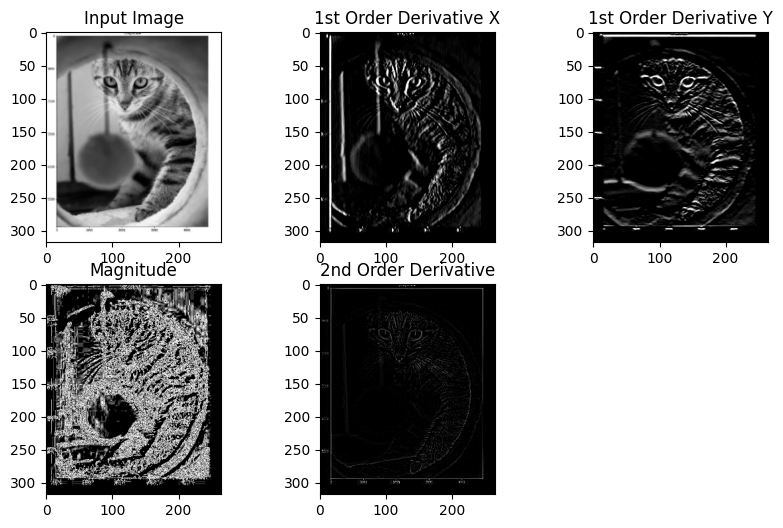

In [17]:
# Task 1
# 1st order derivative filters
dx_filter = np.array([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]])

dy_filter = np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]])

# Apply 1st order derivative filters to the image
derivative_x = cv2.filter2D(image, -1, dx_filter)
derivative_y = cv2.filter2D(image, -1, dy_filter)

# Combine the x and y derivatives to get the magnitude
magnitude = np.sqrt(derivative_x**2 + derivative_y**2).astype(np.uint8)

# Define the 2nd order derivative filter
laplacian_filter = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply the 2nd order derivative filter to the image
second_derivative = cv2.filter2D(image, -1, laplacian_filter)

# Display the results using matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Input Image")

plt.subplot(2, 3, 2)
plt.imshow(derivative_x, cmap='gray')
plt.title("1st Order Derivative X")

plt.subplot(2, 3, 3)
plt.imshow(derivative_y, cmap='gray')
plt.title("1st Order Derivative Y")

plt.subplot(2, 3, 4)
plt.imshow(magnitude, cmap='gray')
plt.title("Magnitude")

plt.subplot(2, 3, 5)
plt.imshow(second_derivative, cmap='gray')
plt.title("2nd Order Derivative")

plt.show()


Noise Type: Gaussian Noise


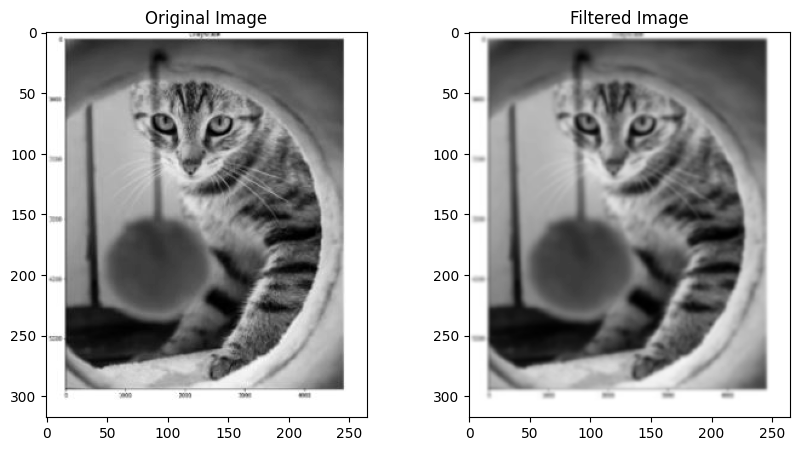

In [18]:
#Task 2
# Function to identify noise type
def identify_noise(image):
    # standard deviation
    std_deviation = np.std(image)

    threshold = 30

    if std_deviation < threshold:
        return "Salt and Pepper Noise"
    else:
        return "Gaussian Noise"

# noise in the image
noise_type = identify_noise(image)
print(f"Noise Type: {noise_type}")

filtered_image = None

if noise_type == "Salt and Pepper Noise":
    # median filter
    filtered_image = cv2.medianBlur(image, 5)
elif noise_type == "Gaussian Noise":
    # Gaussian filter
    filtered_image = cv2.GaussianBlur(image, (5, 5), 0)

# results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")

plt.show()


In [20]:
#task3
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# synthetic dataset
X_synthetic, y_synthetic = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic, test_size=0.3, random_state=42)

#  logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")


Accuracy of the logistic regression model: 0.97


Accuracy of the logistic regression model: 0.50


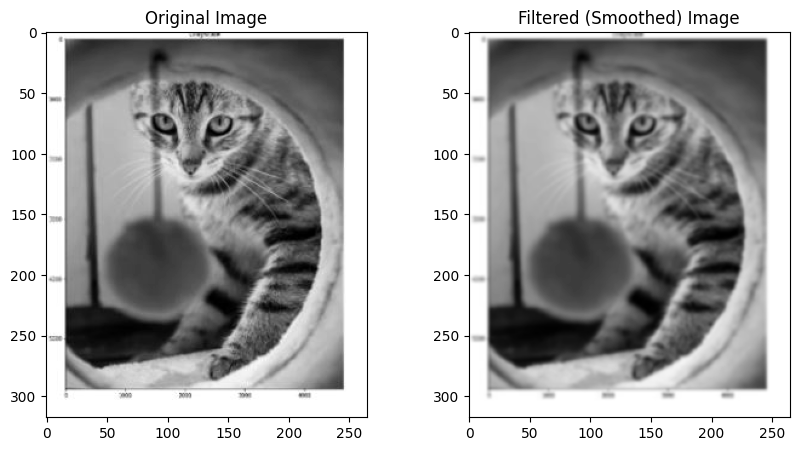

In [22]:
#task4
# Gaussian blur filter
filtered_image = cv2.GaussianBlur(image, (5, 5), 0)

# Flatten the image
flattened_image = filtered_image.reshape(-1)

labels = np.random.randint(0, 2, len(flattened_image))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flattened_image, labels, test_size=0.3, random_state=42)

# logistic regression
logistic_reg = LogisticRegression()

# train data
logistic_reg.fit(X_train.reshape(-1, 1), y_train)

y_pred = logistic_reg.predict(X_test.reshape(-1, 1))

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered (Smoothed) Image")

plt.show()


# Task 5

Accuracy of the logistic regression model: 0.50


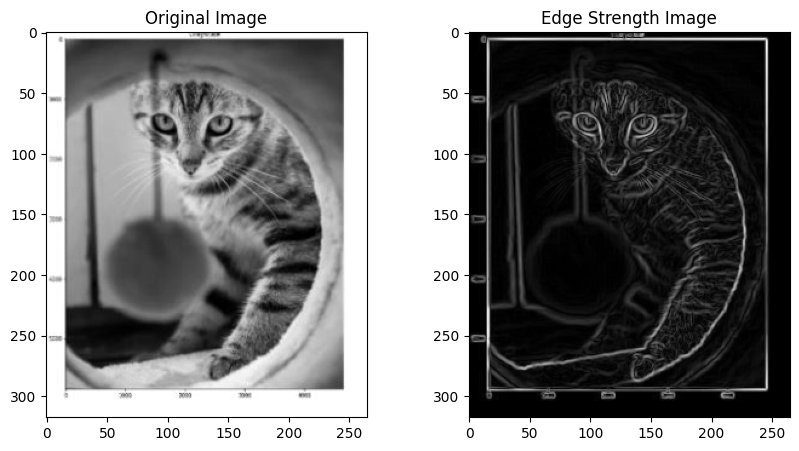

In [23]:
# Sobel edge detection filter
sobel_filtered_image_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_filtered_image_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Edge strength
edge_strength = np.sqrt(sobel_filtered_image_x**2 + sobel_filtered_image_y**2)

# Flatten the edge strength image
flattened_edge_strength = edge_strength.reshape(-1)

labels = np.random.randint(0, 2, len(flattened_edge_strength))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(flattened_edge_strength, labels, test_size=0.3, random_state=42)

# Logistic regression
logistic_reg = LogisticRegression()

# Train data
logistic_reg.fit(X_train.reshape(-1, 1), y_train)

y_pred = logistic_reg.predict(X_test.reshape(-1, 1))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

# Display the original and edge strength images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(edge_strength, cmap='gray')
plt.title("Edge Strength Image")

plt.show()
